## [MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)

In [1]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import random
import numpy as np
import torch
import torchvision

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [4]:
dataset = torchvision.datasets.QMNIST('./data', download=True)

100%|██████████| 9704059/9704059 [00:00<00:00, 41380790.88it/s]


Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 51664363.27it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


In [5]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.QMNIST'>


In [6]:
print(len(dataset))

60000


In [7]:
n = 200
data, target = dataset[n]

In [8]:
print(type(data))

<class 'PIL.Image.Image'>


In [9]:
print(data.mode, data.width, data.height)

L 28 28


In [10]:
print(type(target))

<class 'int'>


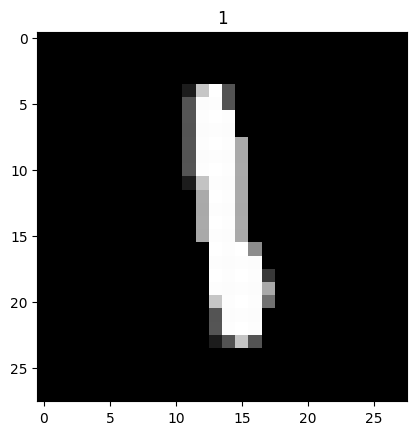

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [12]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.QMNIST('./data', transform = ToTensor)

In [13]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


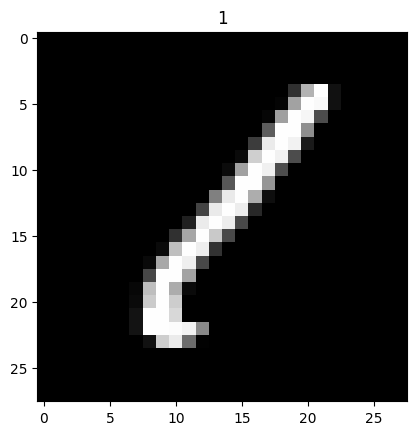

In [14]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [15]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


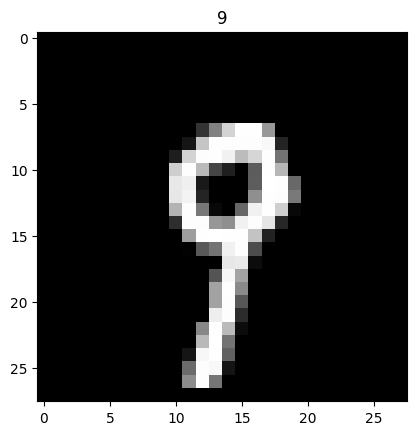

In [16]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [17]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [18]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [19]:
print(is_cuda)
print(device)

True
cuda


In [20]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.QMNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.QMNIST(root='./data/', train=False, transform=compose, download=True)

100%|██████████| 9742279/9742279 [00:00<00:00, 33214722.15it/s]


Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 60109343.21it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [21]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 60000


In [22]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [23]:
class MNISTModel(nn.Module):
    def __init__(self, output_size):
        super(MNISTModel, self).__init__()
        self.cv = nn.Sequential( # (n, 1, 28, 28)
                nn.Conv2d(1, 8, kernel_size=3), # 1 = input channel size(gray), 8 = output(filter) volume size (n, 8, 26, 26)
                                              # padding = 0, stride = (1, 1)
                                # (n, 8, 26, 26)
                nn.ReLU(),
                nn.MaxPool2d(2), # (n, 8, 13, 13)
                nn.Conv2d(8, 10, kernel_size=4), # (n, 10, 10, 10)
                nn.ReLU(),
                nn.MaxPool2d(2) # (n, 10, 5, 5)
        )

        self.fc = nn.Sequential(nn.Linear(10*5*5, output_size),
              )        
        
    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 10*5*5)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [24]:
model = MNISTModel(10).to(device)

In [25]:
print(model)

MNISTModel(
  (cv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 10, kernel_size=(4, 4), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=250, out_features=10, bias=True)
  )
)


In [26]:
print(sum(p.numel() for p in model.parameters()))

3880


In [27]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[-0.0197, -0.0144,  0.0113, -0.0124,  0.0556, -0.0263, -0.0356, -0.0422,
         -0.0965, -0.0090],
        [-0.0040, -0.0192,  0.0179, -0.0012,  0.0631, -0.0646, -0.0354, -0.0231,
         -0.0934, -0.0314],
        [ 0.0020,  0.0201,  0.0389, -0.0225,  0.0724, -0.0463, -0.0540, -0.0348,
         -0.1426, -0.0479],
        [-0.0347, -0.0087, -0.0003, -0.0151,  0.0774, -0.0346, -0.0395, -0.0321,
         -0.1051,  0.0222],
        [-0.0062, -0.0281,  0.0037, -0.0313,  0.0827, -0.0343, -0.0329, -0.0238,
         -0.1106, -0.0064],
        [-0.0049, -0.0027,  0.0089, -0.0200,  0.0662, -0.0454, -0.0641, -0.0212,
         -0.1251,  0.0051],
        [-0.0182, -0.0124,  0.0196, -0.0157,  0.0524, -0.0220, -0.0523,  0.0002,
         -0.0950, -0.0308],
        [-0.0237, -0.0031,  0.0241, -0.0176,  0.0714, -0.0294, -0.0317, -0.0200,
         -0.1262, -0.0191],
        [ 0.0104, -0.0109,  0.0015, -0.0291,  0.0663, -0.0471, -0.0617, -0.0170,
         -0.1333, -

In [28]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [29]:
model = MNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 5 # 5회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()
        del test_target

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 1.6951930522918701 test loss: 0.7355818152427673, accuracy: 80.5250015258789
epoch 1th training loss: 0.4940471053123474 test loss: 0.36654144525527954, accuracy: 89.41333770751953
epoch 2th training loss: 0.32944536209106445 test loss: 0.28247490525245667, accuracy: 91.8550033569336
epoch 3th training loss: 0.26500096917152405 test loss: 0.2346986085176468, accuracy: 93.28333282470703
epoch 4th training loss: 0.22519662976264954 test loss: 0.20313285291194916, accuracy: 94.04499816894531


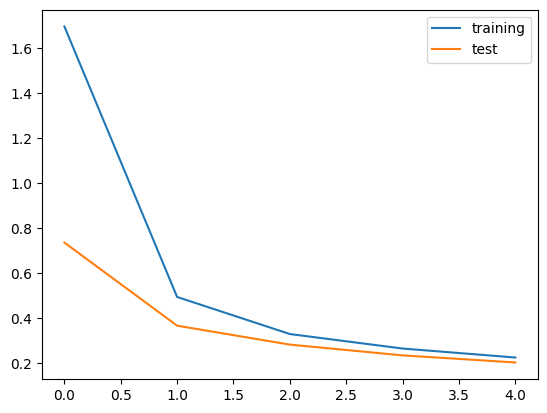

In [30]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.934
